## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [655]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [656]:
df=pd.read_csv(r'C:\program alaa\excel 001\ab_data.csv')

In [657]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [658]:
df.shape

(294478, 5)

number of rows=294478

c. The number of unique users in the dataset.

In [659]:
df['user_id'].value_counts()

746755    2
722274    2
892271    2
736112    2
728134    2
         ..
700160    1
698113    1
704258    1
702211    1
630732    1
Name: user_id, Length: 290584, dtype: int64

number of unique users =290584

d. The proportion of users converted.

In [660]:
df_conv= df[df['converted']==1]

In [661]:
proportion_conv=(len(df_conv)/len(df))*100

In [662]:
proportion_conv

11.96591935560551

The proportion of users converted=11.96%

e. The number of times the `new_page` and `treatment` don't line up.

In [663]:
df_mismatch1=df[(df['landing_page']=='new_page')&(df['group']!='treatment')]

In [664]:
df_mismatch1

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [665]:
df_mismatch2=df[(df['landing_page']=='old_page')&(df['group']=='treatment')]

In [666]:
df_mismatch2

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [667]:
no_rows=len(df_mismatch1)+len(df_mismatch2)
no_rows

3893

there are 3856 rows where the landing_page=new_page dont line up with a group category treatment

f. Do any of the rows have missing values?

In [668]:
df.isnull().sum().sum()

0

the data has no nulls

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [669]:

df_mismatch3=df[(df.landing_page=='old_page')&(df.group!='control')]
df_mismatch4=df[((df.landing_page!='old_page')&(df.group=='control'))]


In [670]:
frames=[df_mismatch1,df_mismatch2,df_mismatch3,df_mismatch4]
mismatching=pd.concat(frames)

In [671]:
mismatching

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [672]:
df2=pd.DataFrame()
df2=df

In [673]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [674]:
df2.drop(df2[((df2['landing_page']=='new_page')&(df2['group']!='treatment'))|((df2['landing_page']=='old_page')&(df2['group']=='treatment'))|
           ((df2.landing_page=='old_page')&(df2.group!='control'))|((df2.landing_page!='old_page')&(df2.group=='control'))].index,inplace=True)

In [675]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [676]:
df2.shape

(290585, 5)

In [677]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [678]:
df2['user_id'].value_counts()

773192    2
630836    1
634271    1
753093    1
751044    1
         ..
803549    1
809694    1
807647    1
895712    1
630732    1
Name: user_id, Length: 290584, dtype: int64

number of unique ids=290584

b. There is one **user_id** repeated in **df2**.  What is it?

773192 

c. What is the row information for the repeat **user_id**? 

In [679]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [680]:
df2.drop(df2[(df2['timestamp']=='2017-01-09 05:37:58.781806')].index,inplace=True)

In [681]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [682]:
(df2.converted==1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [683]:
df2.query('group=="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [684]:
df2.query('group=="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [685]:
n=df2[df2['landing_page']=='new_page']

In [686]:
len(n)/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.** no sufficient evidence as the propability of a customer getting convernted is 0.119 while the propability of a customer to convernt given that the landing page the customer browsed is the new page is only 0.118 which is nearly the same propability a customer converts in general so there is no evidence that the new_page had an effect 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.** null hypotheses : The new page is equal or less in its impact on conversion actions  𝑝𝑛𝑒𝑤 =< 𝑝𝑜𝑙𝑑
alternative hypotheses: the new page performs better than the old page in increasing conversions 𝑝𝑛𝑒𝑤 > 𝑝𝑜𝑙𝑑

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [687]:
𝑝𝑛𝑒𝑤=(df2.converted==1).mean()

In [688]:
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [689]:
pold=pnew

In [690]:
pold

0.11959708724499628

c. What is $n_{new}$?

In [691]:
new_page=df2[df2['landing_page']=='new_page']

In [692]:
new_page.shape

(145310, 5)

In [693]:
  𝑛𝑛𝑒𝑤 =145310

d. What is $n_{old}$?

In [694]:
old_page=df2[df2['landing_page']=='old_page']

In [695]:
old_page.shape

(145274, 5)

In [696]:
nold=145274

In [697]:
df2.groupby('user_id')['converted'].sum()

user_id
630000    0
630001    1
630002    0
630003    0
630004    0
         ..
945994    0
945996    0
945997    0
945998    0
945999    0
Name: converted, Length: 290584, dtype: int64

sample size =number of ones in df2 =290584

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [698]:
sample_new_page=new_page.sample(29058)
means_new=[]
for _ in range(10000):
    bootsample=sample_new_page.sample(29058,replace=True)
    means_new.append(bootsample.converted.mean())

(array([  23.,  142.,  673., 1783., 2740., 2637., 1458.,  446.,   88.,
          10.]),
 array([0.11181086, 0.11322527, 0.11463969, 0.1160541 , 0.11746851,
        0.11888292, 0.12029734, 0.12171175, 0.12312616, 0.12454057,
        0.12595499]),
 <BarContainer object of 10 artists>)

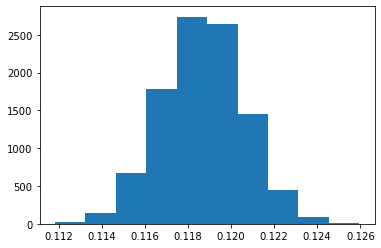

In [568]:
plt.hist(means_new)

In [569]:
y=np.array(means_new)
pnew=y.mean()

In [570]:
pnew

0.11869630050244338

In [571]:
new_page_converted=[]
new_page_converted=new_page['converted']

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [572]:
old_page_converted=[]
old_page_converted=old_page['converted']

In [574]:
sample_old_page=old_page.sample(29058)
means_old=[]
for _ in range(10000):
    bootsample=sample_old_page.sample(29058,replace=True)
    means_old.append(bootsample.converted.mean())

(array([1.000e+00, 1.700e+01, 1.850e+02, 8.730e+02, 2.279e+03, 3.068e+03,
        2.291e+03, 1.025e+03, 2.300e+02, 3.100e+01]),
 array([0.11225824, 0.11377246, 0.11528667, 0.11680088, 0.11831509,
        0.11982931, 0.12134352, 0.12285773, 0.12437195, 0.12588616,
        0.12740037]),
 <BarContainer object of 10 artists>)

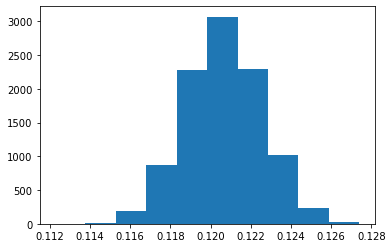

In [575]:
plt.hist(means_old)


In [579]:
old_sample_distribution=np.array(means_old)
pold=old_sample_distribution.mean()

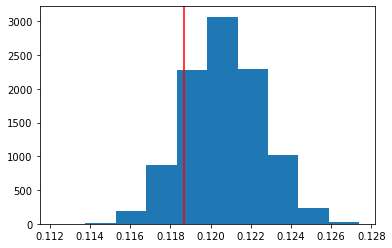

In [580]:
#pnew lies with seems to belong to the same distribution of the old_page conversion rates we seem to attain the null hypothese
plt.hist(means_old) 
plt.axvline(x=pnew,color='red')

In [581]:
pold

0.1206691651180398

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [582]:
pnew-pold

-0.001972864615596412

In [596]:
p_actual=pnew-pold

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [590]:
p_diffs=[]
new_converted_simulation=np.random.binomial(n_new,pnew,10000)/n_new
old_converted_simulation=np.random.binomial(n_new,pnew,10000)/n_new
p_diffs=new_converted_simulation-old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   7.,   42.,  349., 1097., 2353., 3109., 2097.,  770.,  163.,
          13.]),
 array([-0.00493428, -0.00400867, -0.00308306, -0.00215746, -0.00123185,
        -0.00030624,  0.00061937,  0.00154497,  0.00247058,  0.00339619,
         0.00432179]),
 <BarContainer object of 10 artists>)

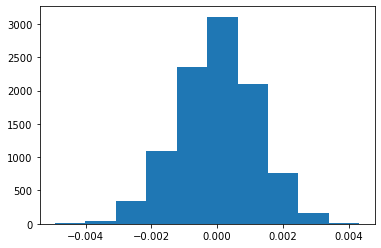

In [591]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [595]:
#the confidence interval contains 0 which means that we fail to reject the null hypotheses
np.percentile(p_diffs,2.5),np.percentile(p_diffs,97.5)

(-0.0023948799119124647, 0.0022985341683297716)

In [592]:
p_diffs=np.array(p_diffs)

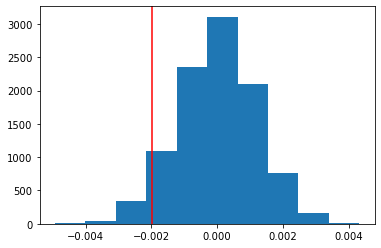

In [593]:
plt.hist(p_diffs)
plt.axvline(x=p_actual,color='red')

In [594]:
(p_diffs>p_actual).mean()

0.9479

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** the computed value is called the p-value it is used to show how extreme is the produced mean with respect to a certain sample distribution that if this mean is extreme the p-value is very small typically(0.005 or 0.001 in some applications)which is a an evidence that this mean doesnt belong to this population and is belonging to an entirely different population on the other hand if the p-value is large it means that the mean being tested is not different from other means in the population (not extreme) which means that it may have come from the the same population its tested to prove that it is significantlly different from it but its is proved to not be significantly different 


in this case of old and new pages:
the large p-value calculated above(0.9479) indicates that the difference in conversion rates is not due to a significant difference between the new and the old pages 
which means that the null hypotheses is true that the pnew=< pold

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [489]:
import statsmodels.api as sm

convert_old =old_page[old_page['converted']==1]['converted'].sum()
convert_new=new_page[new_page['converted']==1]['converted'].sum()
n_old_shape =old_page.shape
n_new_shape =new_page.shape

In [490]:
n_old_shape

(145274, 5)

In [491]:
n_old=145274

In [492]:
convert_old 

17489

In [493]:
n_new_shape

(145310, 5)

In [494]:
n_new=145310

In [495]:
convert_new

17264

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [603]:
counts=[17264,17489] #order of the parameter differs according to the alternative hypotheses H1:pnew>pold

In [604]:
nobs=[145310,145274]

In [605]:
#performing one-sided t-test 
from statsmodels.stats.proportion import proportions_ztest
test_statistic,p_value=proportions_ztest(counts,nobs,alternative='larger')

In [606]:
test_statistic

-1.3109241984234394

In [607]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.** for a confidence interval of 95% the crossponding z value at the boundry of the rejection region of the right  one sided t-test is 1.64 ,since our z-score is -0.7436 so it lies with in the 95% accepted region which means that we failed to reject the null hypotheses 
the p-value  calculated here =0.9 same as calculated before which means we again fail to reject the null hypotheses 

the values obtained in this section totally agrees with the findings in j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [629]:
df2['intercept']=1


In [630]:
df2[['treatment','control']]=pd.get_dummies(df['group'])

In [631]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [632]:
df2=df2.drop('control',axis=1)

In [633]:
df2['ab_page']=df2['treatment']

In [634]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,1


In [635]:
df2=df2.drop('treatment',axis=1)

In [636]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [638]:
lm=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [639]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:               8.085e-06
Time:                        09:40:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.** null hypotheses H0:pnew-pold equals 0
                          alternative hypothese:pnew-pold not equals 0
 which means we are performing a two-sided t-test while in part two we performed a one-sided t-test as our hypotheses were to test if the pnew is less than or more than pold                         


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.** maybe the individual gender has an effect that for example maybe our products interests women more than men or maybe age will have an effect that the page desgin is more liked by kids or elderlys 

its not a good idea to add more variables because when the complexity of the model increases it becomes harder to have a clear interpertation of the results although we can be exposed to variables that are not linearly related to the target variable or variables that are corelated one another which violates the independence constrications of the model

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [640]:
countries_df = pd.read_csv(r'C:\program alaa\excel 001/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [641]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0


In [642]:
df_new['country'].value_counts

<bound method IndexOpsMixin.value_counts of user_id
630000    US
630001    US
630002    US
630003    US
630004    US
          ..
945994    UK
945996    US
945997    US
945998    CA
945999    US
Name: country, Length: 290585, dtype: object>

In [643]:
### Create the necessary dummy variables
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])

In [644]:
df_new=df_new.drop('US',axis=1)#let US be our baseline variable

In [645]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,0,1


In [653]:
df_new.groupby(['country'])['converted'].sum()

country
CA     1672
UK     8739
US    24342
Name: converted, dtype: int64

In [646]:
### Fit Your Linear Model And Obtain the Results
lm=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','CA']])
results=lm.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [647]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:               2.324e-05
Time:                        10:02:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
ab_page        0.0150      0.011      1.308      0.191      -0.007       0.037
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

if the country is US we predict the mean of the conversions to be 2.045 which is different from our perivious predictions with out considering the country that the individual lives in which sugessts that the country affects the conversion rate 
we perdict individuals living in the UK to have a conversion mean 0.00506 less than those in the US
we perdict individuals living in the CA to have a conversion mean 0.00408 less than those in the US

In [654]:
#this agrees with our predictions 
df_new.groupby(['country'])['converted'].sum()

country
CA     1672
UK     8739
US    24342
Name: converted, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [648]:
# adding ineraction variables to account for the dependency between the ab_page and country variables 
df_new['ab_UK']=df_new['ab_page']*df_new['UK']
df_new['ab_CA']=df_new['ab_page']*df_new['CA']

In [649]:
lm=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','CA','ab_UK','ab_CA']])
results=lm.fit()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


In [650]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:               3.483e-05
Time:                        10:18:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0715      0.037    -55.798      0.000      -2.144      -1.999
ab_page        0.0674      0.052      1.297      0.195      -0.034       0.169
UK             0.0901      0.040      2.225      0.026       0.011       0.169
CA             0.0644      0.038      1.678      0.093      -0.011       0.140
ab_UK         -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

once we add the interaction terms our model changed the new calculated coffiences means that for a unit change in the each of the variables will correspond to a different change in conversion rate from that obtained in g1 before adding the interaction terms which means that the model obtained after adding the interacton term is the right one as it accounts for the dependenices between the model input variables

<a id='conclusions'></a>
## Conclusions
we have a sufficient statistical evidence to recommend rejecting the new page 
 as future work we aim at 
investigating the impact of individual's related personal data including , age ,gender ,education 
theses factors may have a huge impact on why a group of people may prefer the old page while others may prefer the new page 
we need also to do further investigations related to time to know if some days had conversions more than others may be there are factors affecting converions like peoples being on holidays or other time related factors

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.